<a href="https://colab.research.google.com/github/hyesukim1/Data_competition_study/blob/main/%5B%EB%8D%B0%EC%9D%B4%EC%BD%98%5D%EC%84%9C%EC%9A%B8_%EB%9E%9C%EB%93%9C%EB%A7%88%ED%81%AC_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image # 이미지를 불러오기 위한 라이브러리
import matplotlib.pyplot as plt # 그림을 표시하기 위한 라이브러리
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [ ]:
# ! unzip /content/drive/MyDrive/dataset.zip -d /content/drive/MyDrive/

In [ ]:
# 파일명, 라벨명 읽어오기
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
train_data

### 라벨명 갯수 및 라벨 별 이미지 수 확인

In [ ]:
# 라벨 갯수 확인 => 9개
train_data['label'].unique()

array([9, 4, 1, 6, 5, 8, 7, 2, 3, 0])

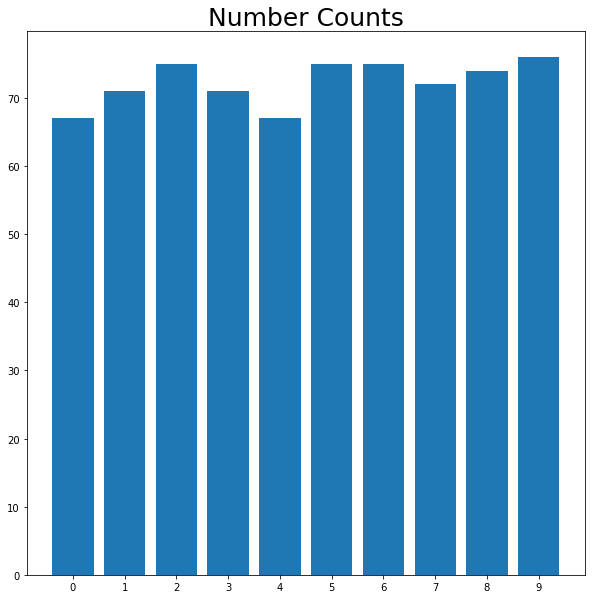

라벨 0의 개수는 67개 입니다.
라벨 1의 개수는 71개 입니다.
라벨 2의 개수는 75개 입니다.
라벨 3의 개수는 71개 입니다.
라벨 4의 개수는 67개 입니다.
라벨 5의 개수는 75개 입니다.
라벨 6의 개수는 75개 입니다.
라벨 7의 개수는 72개 입니다.
라벨 8의 개수는 74개 입니다.
라벨 9의 개수는 76개 입니다.


In [ ]:
# 이미지 라벨별 갯수
train_label = train_data['label']
label_counter = Counter(train_label)

plt.figure(figsize=(10, 10))
plt.title("Number Counts", fontsize=25)
plt.bar(x=list(label_counter.keys()), height=list(label_counter.values()))
plt.xticks(list(range(10)))
plt.show()

for i in range(10):
  print(f'라벨 {i}의 개수는 {label_counter[i]}개 입니다.')

### 훈련 이미지 데이터 시각화

In [ ]:
train_file_name = train_data['file_name']

train_image = []
for file in train_file_name:
    train_image.append(Image.open("/content/drive/MyDrive/train/"+file))

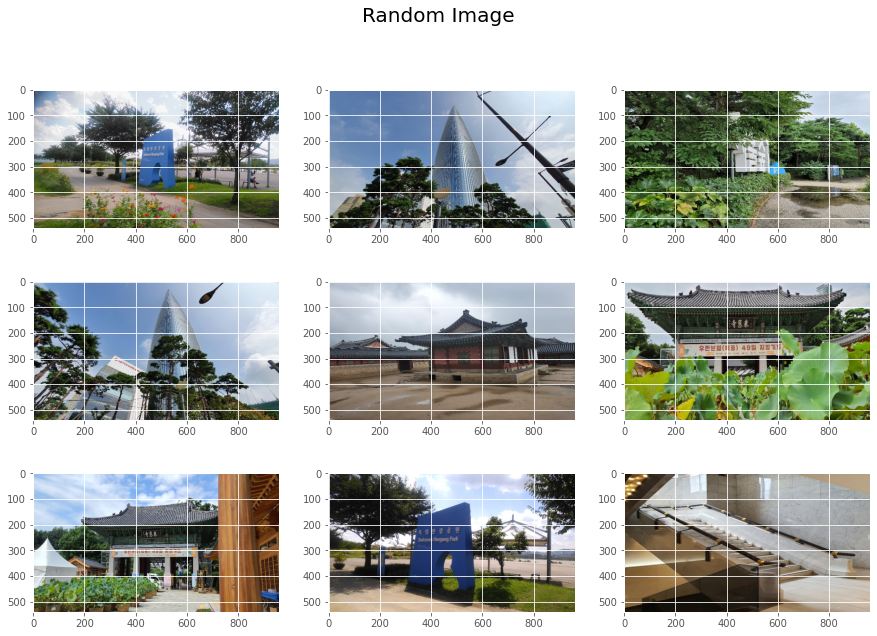

In [ ]:
random_images = np.random.permutation(train_image)[:9] 

plt.style.use('ggplot')
fig, ax = plt.subplots(3,3, figsize=(15,10))
fig.suptitle("Random Image", fontsize=20)
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(random_images[i-1])
plt.show()

### 베이스 라인 모델 빌드 및 컴파일

In [ ]:
from tqdm import tqdm
import tensorflow as tf    
import cv2 
import os

In [ ]:
IMAGE_SIZE = (150, 150)

In [ ]:
datasets = ['/content/drive/MyDrive/train']
output = []

for dataset in datasets:
  
  images = []
  labels = []

  for folder in os.listdir(dataset):
    label = train_data['label']

    for file in os.listdir(os.path.join(dataset, folder)):

      img_path = os.path.join(os.path.join(datasets, folder), file)
      
      image = cv2.imread(img_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image = cv2.resize(image, IMAGE_SIZE)

      images.append(image)
      labels.append(label)

images = np.array(images, dtype = 'float32')
labels = np.array(labels , dtype = 'int32')

output.append((images, labels))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)